<a href="https://colab.research.google.com/github/Reviandi-Naufal/Data_Related_Notebook/blob/main/reviandinaufalk_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Quiz 1 : Pemahaman</h1>

1. Sebutkan apa saja kira2 preprocessing Data?
 - Melakukan Encoding kategori dari data 
 - Menangani value yang bersisi nol/nan dengan cara dihapus atau diganti dengan value lainnya yang sesuai
 - Melakukan centering dan scaling pada data sehingga sebaran data dari tiap kategori sama 
2. Jelaskan beberapa cara imputing missing value?
 - Dengan menghilangkan satu baris atau kolom dengan .dropna() jika dalam satu baris/kolom isinya NaN semua.
 - Dengan mengisi Nilai kosong tsb dengan nilai lain yang bersesuaian. Dapat berupa median, mean, modus, atau data yanng terletak sebelum/sesudah data yang missing value tersebut.
 - Dengan menggunakan metode knnimpute, dapat dimasukan data yang bertetanggaan dengan data missing value.
3. Kapan kita perlu melakukan feature centering dan scaling?
 - Saat Persebaran data tiap kategorinya tidak merata. Hal ini dapat menjadikan akurasi model ML kurang baik, oleh karena itu perlu dilakukan centering dan scaling sehingga persebaran data tiap kategori merata. 
4. Bagaimana Data Science Workflow?
 - Ambil data yang ingin di analisis
 - melakukan proses terhadap data tersebut dengan EDA (Explolatory Data Analaysis), data analisis, dan feture engineering.
 - Melakukan data building/modelling terhadap data.  
 - Setelah model selesai dibuat, model tersebut di deploy untuk memprediksi data test.
 - Melakukan monitoring terhadap model tesebut

<h1>Quiz 2 : Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data titanic.csv sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data titanic_test.csv untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![image.png](attachment:image.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

test = pd.read_csv('titanic_test.csv')
train = pd.read_csv('titanic.csv')

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = (['Survived','Dead'])
    df.plot(kind='bar', stacked=True, figsize=(12,5))

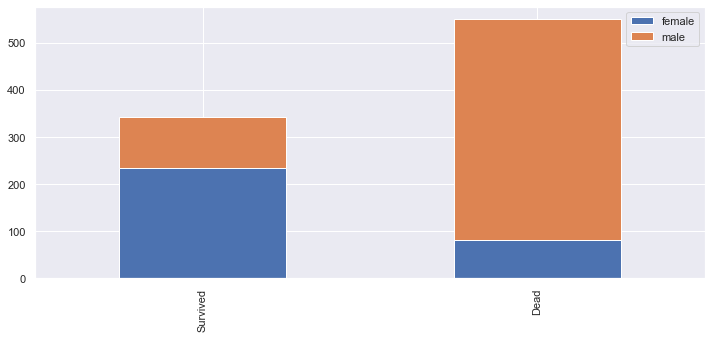

In [ ]:
bar_chart('Sex')

- Male yang paling mungkin untuk mati.
- female yang paling mungkin untuk hidup.

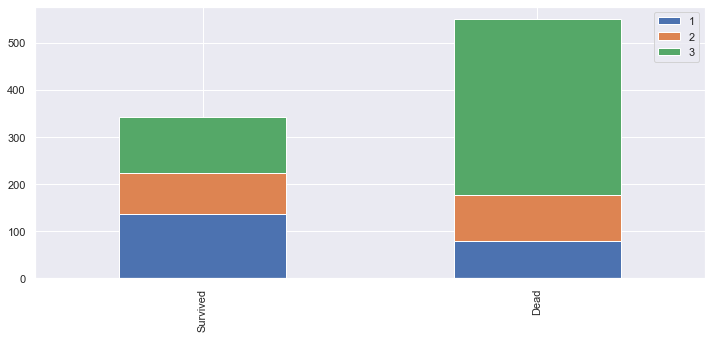

In [ ]:
bar_chart('Pclass')

- penumpang yang berada di kelas 3 paling mungkin mati
- penumpang yang berada di kelas 2 sama rata antara yang mati dan yang hidup
- penumpang yang berada di kelas 1 paling mungkin untuk hidup

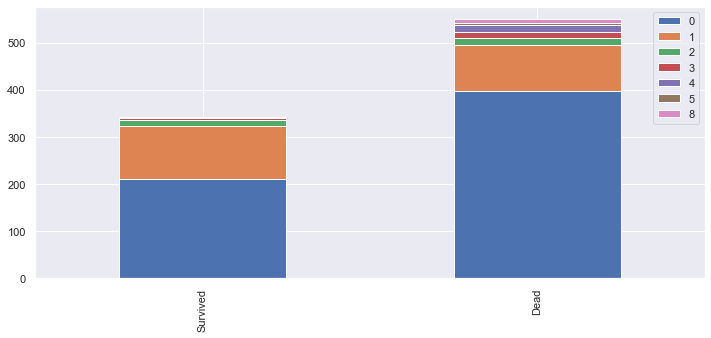

In [ ]:
bar_chart('SibSp')

- Penumpang yang paling besar probabilitasnya mati yang tidak memiliki saudara sama sekali

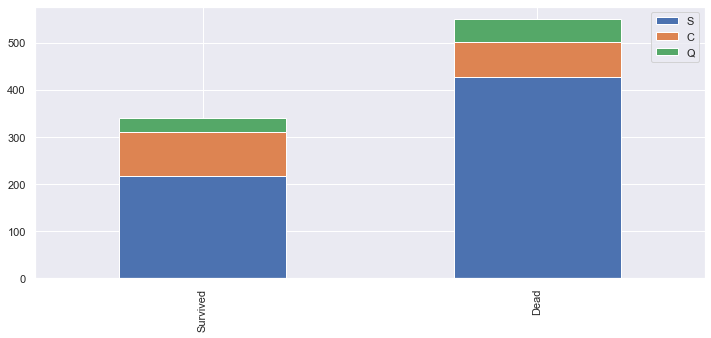

In [ ]:
bar_chart('Embarked')

- penumpang yang berangkat dari southamton paling beresiko mati

## Extract Honorific from Names

In [ ]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Z][a-z]+)\.', expand=False)

In [ ]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [ ]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [ ]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [ ]:
test['Title'].value_counts()

0    240
1     78
2     72
3     28
Name: Title, dtype: int64

## Fill the NaN value in Age columns

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

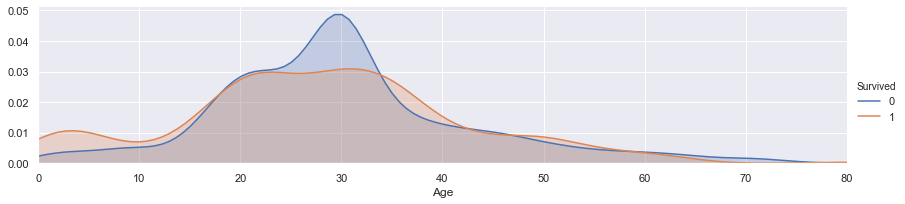

In [ ]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

## Bining 
Bining/Converting Numerical Age to Categorial Variabels so it can be seen clearly

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

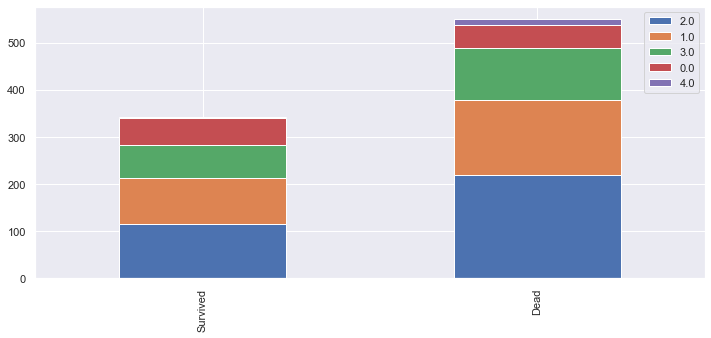

In [ ]:
bar_chart('Age')

## Change the sex label from string to numeric

In [ ]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

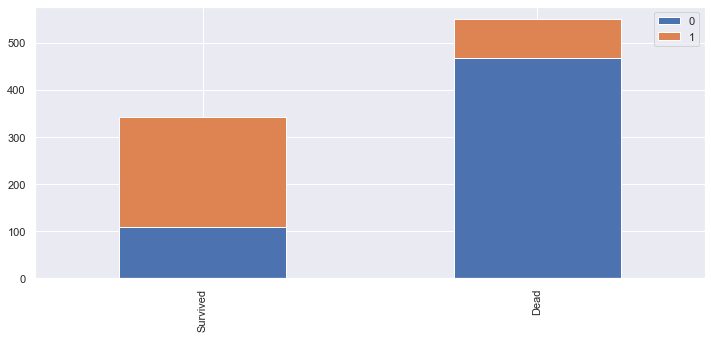

In [ ]:
bar_chart('Sex')

In [ ]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


## Fill missing Value in Embarked

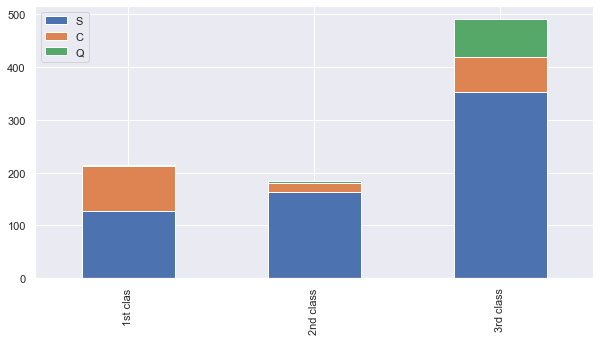

In [ ]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st clas', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
embarked_mapping  = {'S': 0, 'C': 1, 'Q': 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fill Missing Value in Fare

In [ ]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

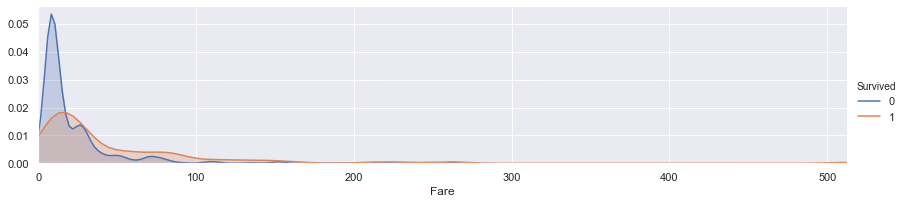

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


## Filling the missing Value in Cabin

In [ ]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
A7             1
A26            1
A19            1
C128           1
C95            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

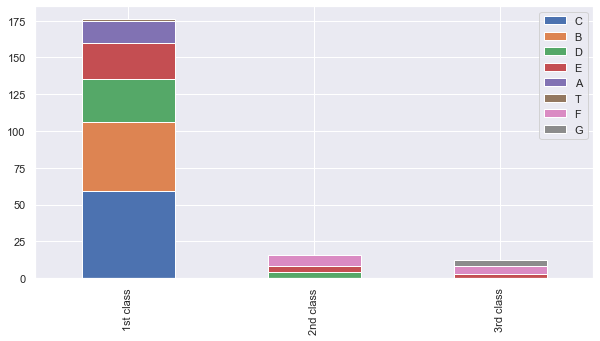

In [ ]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [ ]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## Define FamilySize

In [ ]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

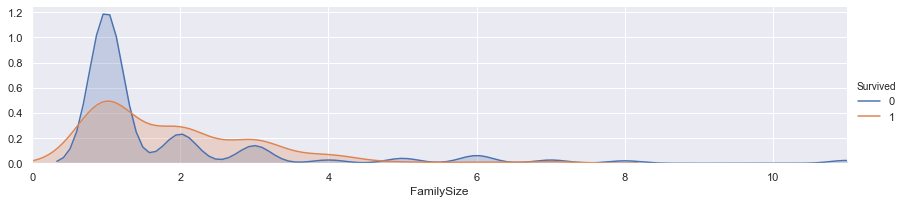

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


## Separate Feature and Target

In [ ]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [ ]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0.0,1.8,0,3,0.0
887,1,1,1.0,1.0,0.4,0,1,0.0
888,3,1,1.0,1.0,2.0,0,1,1.2
889,1,0,1.0,1.0,0.8,1,0,0.0


## Model Selection

In [ ]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### 1. KNN - Model 

In [ ]:
model = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,200), 'weights': ['uniform','distance']}
gscv_knn = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=10)
gscv_knn.fit(train_data, target)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 

### 2. Decision Tree - Model

In [ ]:
model_destree = DecisionTreeClassifier()
param_grid_destree = {'max_depth':np.arange(1,200)}
gscv_destree = GridSearchCV(model_destree, param_grid=param_grid_destree, scoring='accuracy', cv=10)
gscv_destree.fit(train_data, target)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147,

In [ ]:
gscv_knn.best_score_

0.8305742821473159

In [ ]:
gscv_destree.best_score_

0.8372534332084893

#### Karena setelah dibandingkan antara model KNN dengan  Decision Tree  ternyata model Decision Tree memiliki score yang lebih besar, maka model yang akan digunakan yaitu model  Decision Tree

In [ ]:
test_model = DecisionTreeClassifier()
test_model.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = test_model.predict(test_data)

In [ ]:
Final_data = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

Final_data.to_csv('Final_data.csv', index=False)

In [ ]:
Final_data = pd.read_csv('Final_data.csv')
Final_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
